In [1]:
!nvidia-smi

Thu Jul 11 17:46:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
  inflating: imbalanced_data.csv     
  inflating: raw_data.csv            


In [3]:
import pandas as pd

In [38]:
df = pd.read_csv('/content/imbalanced_data.csv')

In [39]:
df.drop("id", axis=1, inplace=True)


In [40]:
df.shape

(31962, 2)

In [41]:
df_raw = pd.read_csv('/content/raw_data.csv')

In [42]:
import seaborn as sns


<Axes: xlabel='label', ylabel='count'>

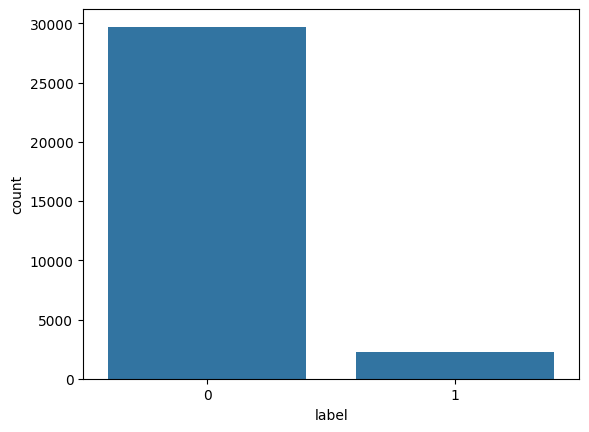

In [43]:
sns.countplot(x='label', data=df)


In [44]:
df_raw[df_raw['class']==0]['class']=1

<ipython-input-44-dbc2ee5b36b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw[df_raw['class']==0]['class']=1


In [45]:
df.isnull().sum()


label    0
tweet    0
dtype: int64

In [46]:
df_raw.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [47]:
df_raw['class'].unique()

array([2, 1, 0])

In [48]:
df_raw['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [49]:
df_raw["class"].replace({0:1},inplace=True)


In [50]:
df_raw["class"].replace({2:0},inplace=True)


In [51]:
df_raw.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [52]:
df_raw.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace =True)


In [53]:
df_raw.rename(columns={'class':'label'},inplace =True)


In [54]:

# Let's concatinate both the data into a single data frame.
frame = [df, df_raw]
df = pd.concat(frame)


In [55]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [56]:
df.shape

(56745, 2)

In [57]:


import re
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [58]:

# Let's apply stemming and stopwords on the data
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

In [59]:
# Let's apply regex and do cleaning.
def data_cleaning(words):
    words = str(words).lower()
    words = re.sub('\[.*?\]', '', words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [word for word in words.split(' ') if words not in stopword]
    words=" ".join(words)
    words = [stemmer.stem(words) for word in words.split(' ')]
    words=" ".join(words)

    return words

In [60]:

# let's apply the data_cleaning on the data.
df['tweet']=df['tweet'].apply(data_cleaning)

In [61]:
df.head()

,label,tweet
0,0,user when a father is dysfunctional and is so...
1,0,user user thanks for lyft credit i cant use ca...
2,0,bihday your majesti bihday your majesti ...
3,0,model i love u take with u all the time in u...
4,0,factsguide society now motiv factsguide s...


In [62]:

x = df['tweet']
y = df['label']


In [63]:
from sklearn.model_selection import train_test_split


In [64]:

# Let's split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)

print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

42558 42558
14187 14187


In [65]:

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [68]:

max_words = 50000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [69]:
sequences_matrix

array([[    0,     0,     0, ...,   209, 13070,  4452],
       [    0,     0,     0, ...,   248,     3,   653],
       [    0,     0,     0, ...,     1,  1831, 41012],
       ...,
       [ 1126,   669,  2785, ...,   187,     1, 33462],
       [    0,     0,     0, ...,   954, 14416,   774],
       [    0,     0,     0, ...,   419,   378,    13]], dtype=int32)

In [70]:

from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D
from keras.optimizers import RMSprop

In [71]:

# Creating model architecture.
model = Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 300, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5080501 (19.38 MB)
Trainable params: 5080501 (19.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])


In [73]:
history = model.fit(sequences_matrix,y_train,batch_size=128,epochs = 5,validation_split=0.2)


Epoch 1/5
266/266 [==============================] - 261s 959ms/step - loss: 0.2765 - accuracy: 0.8920 - val_loss: 0.1984 - val_accuracy: 0.9359
Epoch 2/5
266/266 [==============================] - 245s 923ms/step - loss: 0.1502 - accuracy: 0.9490 - val_loss: 0.1798 - val_accuracy: 0.9409
Epoch 3/5
266/266 [==============================] - 244s 919ms/step - loss: 0.1206 - accuracy: 0.9606 - val_loss: 0.1636 - val_accuracy: 0.9430
Epoch 4/5
266/266 [==============================] - 248s 934ms/step - loss: 0.1033 - accuracy: 0.9680 - val_loss: 0.1936 - val_accuracy: 0.9420
Epoch 5/5
266/266 [==============================] - 244s 917ms/step - loss: 0.0883 - accuracy: 0.9733 - val_loss: 0.2104 - val_accuracy: 0.9329


In [74]:

test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [75]:
# Model evaluation
accr = model.evaluate(test_sequences_matrix,y_test)

444/444 [==============================] - 37s 83ms/step - loss: 0.2419 - accuracy: 0.9247


In [76]:
lstm_prediction = model.predict(test_sequences_matrix)


444/444 [==============================] - 36s 81ms/step


In [78]:
res = []

for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)

In [79]:
from sklearn.metrics import confusion_matrix


In [80]:
print(confusion_matrix(y_test,res))


[[8339  114]
 [ 954 4780]]


In [81]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [82]:
# Let's save the mdoel.
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [83]:
import keras


In [84]:

load_model=keras.models.load_model("model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [86]:


# Let's test our model on custom data.
test = 'i love this movie'

def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

test=[clean_text(test)]
print(test)

seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
print(seq)

pred = load_model.predict(padded)

print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")

i love this movie
i love this movie
['love movi']
[[28, 5904]]
1/1 [==============================] - 0s 263ms/step
pred [[0.09388811]]
no hate
